## Pancreas - processing genes - supplementary figures

In [1]:
### load libraries

# standard libraries
import numpy as np

# single-cell libraries
import scvelo as scv
import anndata as ad
import scanpy as sc

# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing the parameters of the scVelo figures

# import our own functions
from velocity.processing.filtering import *
from velocity.processing.imputation import *
from velocity.processing.normalisation import *
from velocity.tools.fit import *
from velocity.visualisation.vis import *
from velocity.tools.prior import *
from velocity.tools.filtering import *
from velocity.tools.fit import *

### Load original dataset


In [2]:
### load pancreas dataset
dataset_path = "../datasets/pancreas/pancreas.h5ad"
adata = ad.read_h5ad(dataset_path)

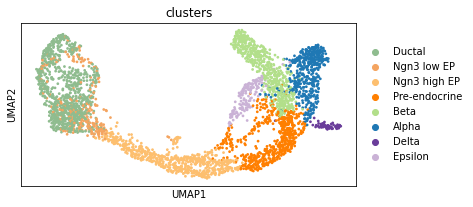

In [3]:
### plot dataset
fig, axs = plt.subplots(1, 1, figsize=(6, 3), frameon=False)
sc.pl.umap(adata, color="clusters", size=30, ax=axs)

In [4]:
### convert matrices from sparse to dense
adata.X = adata.X.todense()
adata.layers['spliced'] = adata.layers['spliced'].todense()
adata.layers['unspliced'] = adata.layers['unspliced'].todense()

In [5]:
### select HVGs
hvgs = get_hvgs(adata, no_of_hvgs=5000, theta=100, layer='spliced')

In [6]:
### select genes 
test_genes = ['Gcg','Acly','Ak4']

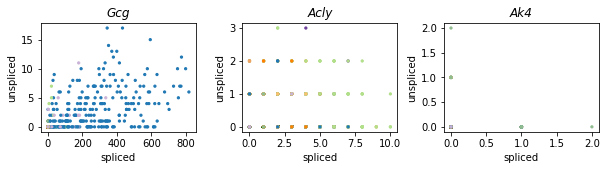

In [7]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["spliced"], adata[:,gene].layers["unspliced"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/hvgs_example.png"
plt.savefig(save_path, dpi=300, transparent=False)

In [8]:
print("Subsetting to top " + str(len(hvgs)) + " highly-variable genes.")
adata = adata[:, hvgs]

Subsetting to top 5000 highly-variable genes.


In [9]:
### subset for genes that have high enough U and S counts
minlim = 4
us_genes = get_high_us_genes(adata, minlim_u=minlim, minlim_s=minlim)
len(us_genes)

406

In [17]:
### select genes 
test_genes = ['Gcg', 'Mt2', 'Ctsz']

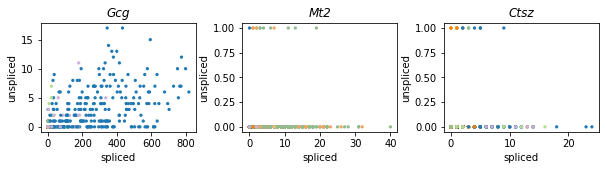

In [18]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["spliced"], adata[:,gene].layers["unspliced"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/us_genes_example.png"
plt.savefig(save_path, dpi=300, transparent=False)

In [19]:
print("Subsetting to " + str(len(us_genes)) + " genes with sufficient S and U counts.")
adata = adata[:,us_genes]

Subsetting to 406 genes with sufficient S and U counts.


In [20]:
### L1 normalise unspliced and spliced together with size vector
normalise_layers(adata, mode='combined', norm='L1')

total_counts not given


In [30]:
### select genes 
test_genes = ['Gcg', 'Nnat', 'Ptov1']

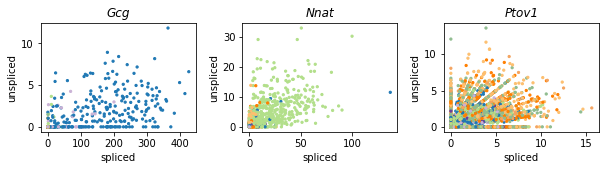

In [31]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["spliced"], adata[:,gene].layers["unspliced"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/normalisation_example.png"
plt.savefig(save_path, dpi=300, transparent=False)

In [32]:
### imputation
impute_counts(adata, n_neighbours = 30, layer_NN = 'spliced', n_pcs = 15)

In [34]:
### select genes 
test_genes = ['Gcg', 'Nnat', 'Ptov1']

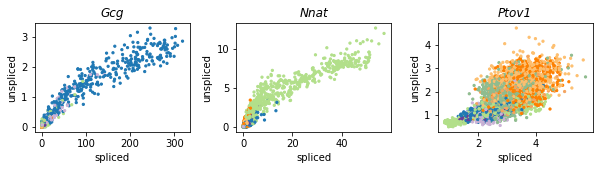

In [35]:
colordict = dict(zip(adata.obs['clusters'].cat.categories, adata.uns["clusters_colors"]))
colors = adata.obs["clusters"].map(colordict).values

fig, axs = plt.subplots(1,3, figsize=(10, 2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.3)
axs = axs.ravel()
for idx, gene in enumerate(test_genes):
    axs[idx].scatter(adata[:,gene].layers["Ms"], adata[:,gene].layers["Mu"], s=5, c=colors)
    axs[idx].set_xlabel('spliced')
    axs[idx].set_ylabel('unspliced')
    axs[idx].set_title(gene, style='italic')
    axs[idx].set_facecolor('white')
fig.patch.set_alpha(0)
    
# save figure
save_path = "../figures/gene_processing/imputation_example.png"
plt.savefig(save_path, dpi=300, transparent=False)

### Recover reaction rate parameters

In [37]:
### recover dynamics for selected genes
recover_reaction_rate_pars(adata, use_raw=False, n=100, fit_kappa=True, fit_scaling=True)

In [38]:
copy_ = adata.copy()

In [39]:
adata = copy_.copy()

### Additional filtering steps


In [40]:
### remove likelihood genes
likelihood_genes = adata.var['fit_likelihood'].sort_values(ascending=False)
likelihood_genes = likelihood_genes.dropna()
likelihood_genes = likelihood_genes[likelihood_genes >= 0.4]
likelihood_genes = likelihood_genes.index.values
len(likelihood_genes)

373

In [117]:
### select genes 
test_genes = ['Gcg', 'Nnat', 'Dnmt3a']

In [124]:
def plot_kinetics(alpha, gamma, spliced, unspliced, Uk, dist=True, weight=1, 
                  k=None, Pi=None, ax=None, c=None,title=None):
    U0, S0 = 0, 0
    Sk = S(alpha, gamma, U0, S0, Uk)
    ax.scatter(spliced, unspliced,c=c, s=5)

    u_range = np.arange(0, Uk + (Uk / 1000), Uk / 1000)
    ax.plot(S(alpha, gamma, U0, S0, u_range), u_range, color="blue")
    
    s_down = S(0, gamma, Uk, Sk, u_range)
    ax.plot(s_down, u_range, color="orange")

    u_steady = np.array([0, u_range[s_down == np.max(s_down)]], dtype=float)
    ax.plot(u_steady / gamma, u_steady, color="grey", alpha=.5)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel('spliced')
    ax.set_ylabel('unspliced')
    ax.set_title(title, style='italic')
    ax.set_facecolor('white')
    ax.text(0.05, 0.95, str(round(adata.var['fit_likelihood'][title], 4)), 
            transform=ax.transAxes, verticalalignment='top', bbox=props)

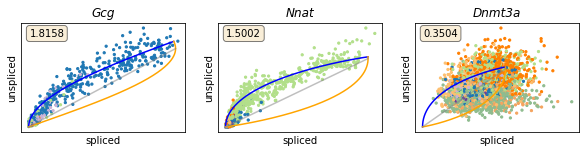

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(10, 2))
    
for i, g in enumerate(test_genes):
    unspliced, spliced = adata[:, g].layers["Mu"][:, 0], adata[:, g].layers[ "Ms"][:, 0]
    alpha, gamma, beta = adata[:, g].var[key + "_alpha"][0], adata[:, g].var[key + "_gamma"][0], adata[:, g].var[key + "_beta"][0]
    Uk, scaling = adata[:, g].var[key + "_U_switch"][0], adata[:, g].var[key + "_scaling"][0]
    sub = (unspliced > 0) & (spliced > 0)
    plot_kinetics(alpha / beta, gamma / beta, spliced[sub], unspliced[sub] * scaling, 
                  Uk, dist=True, weight=1, k=None, Pi=None,ax=axs[i], c=colors[sub], title=g)

# save figure
save_path = "../figures/gene_processing/likelihood_example.png"
plt.savefig(save_path, dpi=300, transparent=False)

In [126]:
print(str(len(likelihood_genes))+" high-likelihood genes kept")
adata = adata[:, likelihood_genes]

373 high-likelihood genes kept


In [127]:
### set prior state on genes
connections_dict = {'Alpha': ['Pre-endocrine'],
                  'Beta': ['Pre-endocrine'],
                  'Delta': ['Pre-endocrine'],
                  'Epsilon': ['Pre-endocrine'],
                  'Pre-endocrine': ['Ngn3 high EP'],
                  'Ngn3 high EP': ['Ductal'],
                  'Ngn3 high EP': [ 'Ngn3 low EP']}

set_prior_state(adata, connections_dict)

In [128]:
### find all genes where prior state matches the retrieved state
matching_genes = get_matching_state_genes(adata, perc_match=60)
len(matching_genes)

139

In [149]:
### select genes 
test_genes = ['Gcg', 'Dock11', 'Ghrl']

In [150]:
def plot_kinetics(alpha, gamma, spliced, unspliced, Uk, dist=True, weight=1, 
                  k=None, Pi=None, ax=None, c=None,title=None):
    U0, S0 = 0, 0
    Sk = S(alpha, gamma, U0, S0, Uk)
    ax.scatter(spliced, unspliced,c=c, s=5)

    u_range = np.arange(0, Uk + (Uk / 1000), Uk / 1000)
    ax.plot(S(alpha, gamma, U0, S0, u_range), u_range, color="blue")
    
    s_down = S(0, gamma, Uk, Sk, u_range)
    ax.plot(s_down, u_range, color="orange")

    u_steady = np.array([0, u_range[s_down == np.max(s_down)]], dtype=float)
    ax.plot(u_steady / gamma, u_steady, color="grey", alpha=.5)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel('spliced')
    ax.set_ylabel('unspliced')
    ax.set_title(title, style='italic')
    ax.set_facecolor('white')

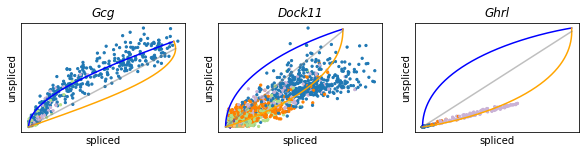

In [151]:
fig, axs = plt.subplots(1, 3, figsize=(10, 2))
    
for i, g in enumerate(test_genes):
    unspliced, spliced = adata[:, g].layers["Mu"][:, 0], adata[:, g].layers[ "Ms"][:, 0]
    alpha, gamma, beta = adata[:, g].var[key + "_alpha"][0], adata[:, g].var[key + "_gamma"][0], adata[:, g].var[key + "_beta"][0]
    Uk, scaling = adata[:, g].var[key + "_U_switch"][0], adata[:, g].var[key + "_scaling"][0]
    sub = (unspliced > 0) & (spliced > 0)
    plot_kinetics(alpha / beta, gamma / beta, spliced[sub], unspliced[sub] * scaling, 
                  Uk, dist=True, weight=1, k=None, Pi=None,ax=axs[i], c=colors[sub], title=g)

# save figure
save_path = "../figures/gene_processing/prior_example.png"
plt.savefig(save_path, dpi=300, transparent=False)

In [ ]:
print(str(len(matching_genes))+" prior state matching genes kept")
adata = adata[:, matching_genes]